# Basic Linear Regression Model

In [14]:
import sys
ver_info = sys.version
print("This jupyter notebook was executed with:\n{0}".format(ver_info));


This jupyter notebook was executed with:
2.7.14 |Anaconda, Inc.| (default, Nov  8 2017, 13:40:45) [MSC v.1500 64 bit (AMD64)]


## Imports

In [15]:
import numpy as np
import matplotlib as mpl
import pandas as pd
from scipy import stats, integrate
import seaborn as sns

import pprint
p = pprint.PrettyPrinter(indent=4)

import config as config

%matplotlib inline
%run utilities.py

In [16]:
import matplotlib.pyplot as plt


## Importing utilities object
+ imports dataset as lists (a training and test set)


In [17]:
util = Utilities({}, use_json=False)
training_list, testing_list = util.get_datasets()


In [18]:
# turning the datasets into pandas DataFrames 

training_DF, testing_DF = util.create_dataframes(training_list, testing_list)

In [19]:
print testing_DF.shape
config.INDEX_segments_avg

(1038, 26)


21

## meta-data features
+ these have pretty decent positive correlation with song_hotttnesss

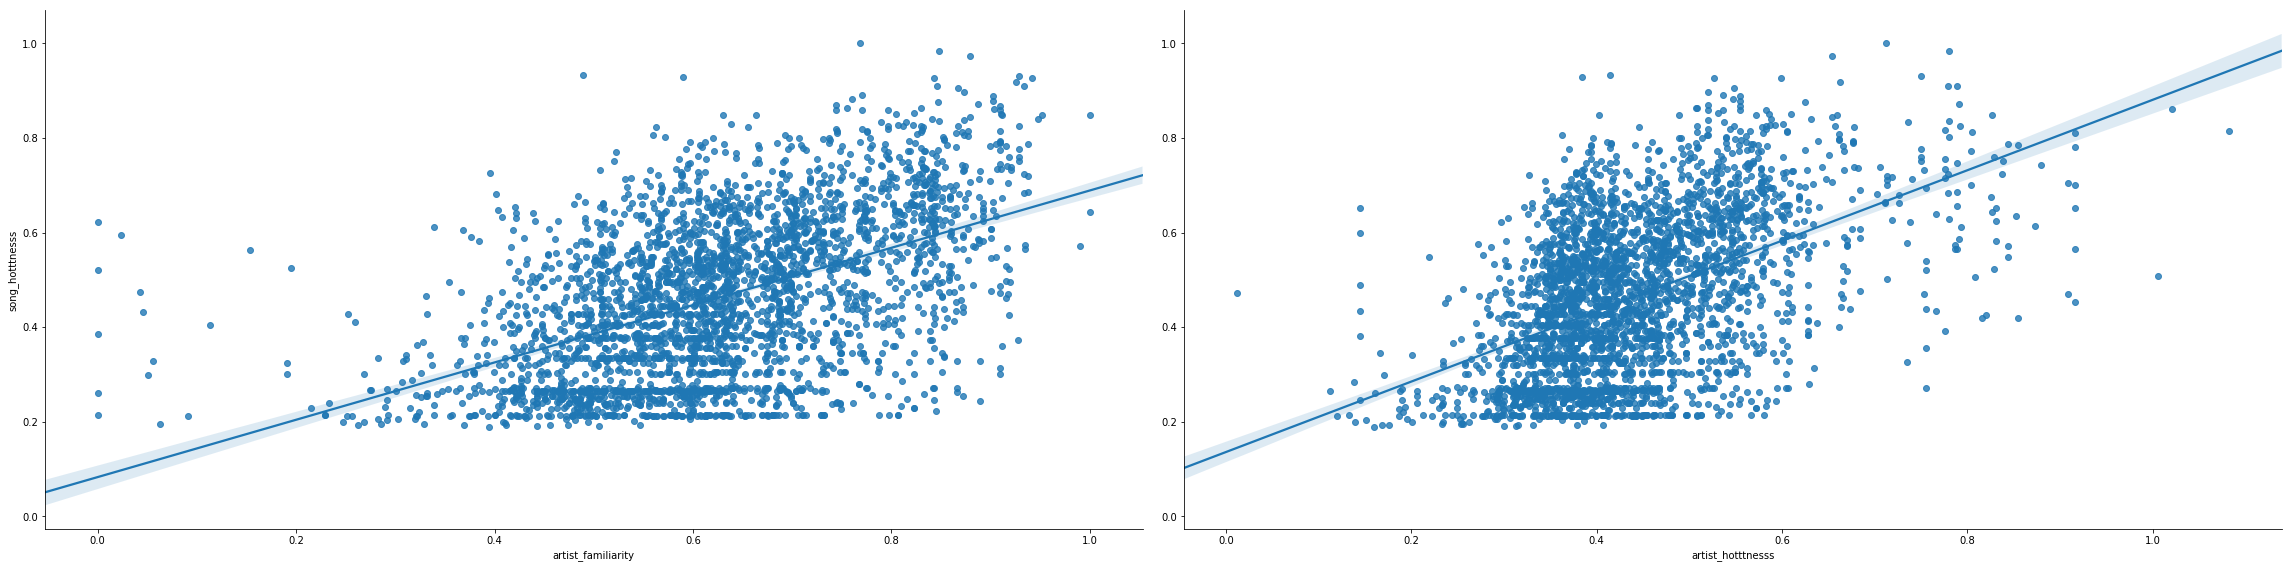

In [20]:
sns.pairplot(training_DF, x_vars=['artist_familiarity', 'artist_hotttnesss'], 
             y_vars='song_hotttnesss', size=8, aspect=2, kind='reg')

## acoustic features
+ very little correlation with these 

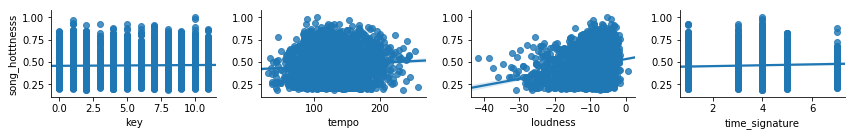

In [21]:
sns.pairplot(training_DF, x_vars=['key', 'tempo', 'loudness', 'time_signature'], 
             y_vars='song_hotttnesss', size=2, aspect=1.5, kind='reg')

In [22]:
# training_DF[training_DF['bars_avg']<0]

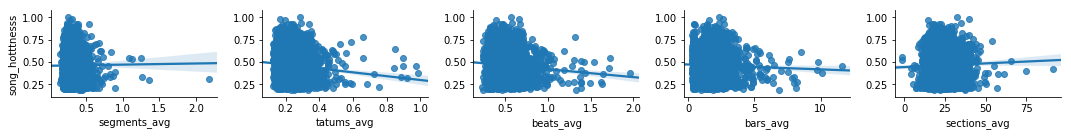

In [23]:
# all the interval averages
sns.pairplot(training_DF, x_vars=['segments_avg', 'tatums_avg', 'beats_avg', 'bars_avg', 'sections_avg'], 
             y_vars='song_hotttnesss', size=2, aspect=1.5, kind='reg')

## Making a derived feature:  energy
`energy`:  The feature mix we use to compute energy includes loudness and segment durations.

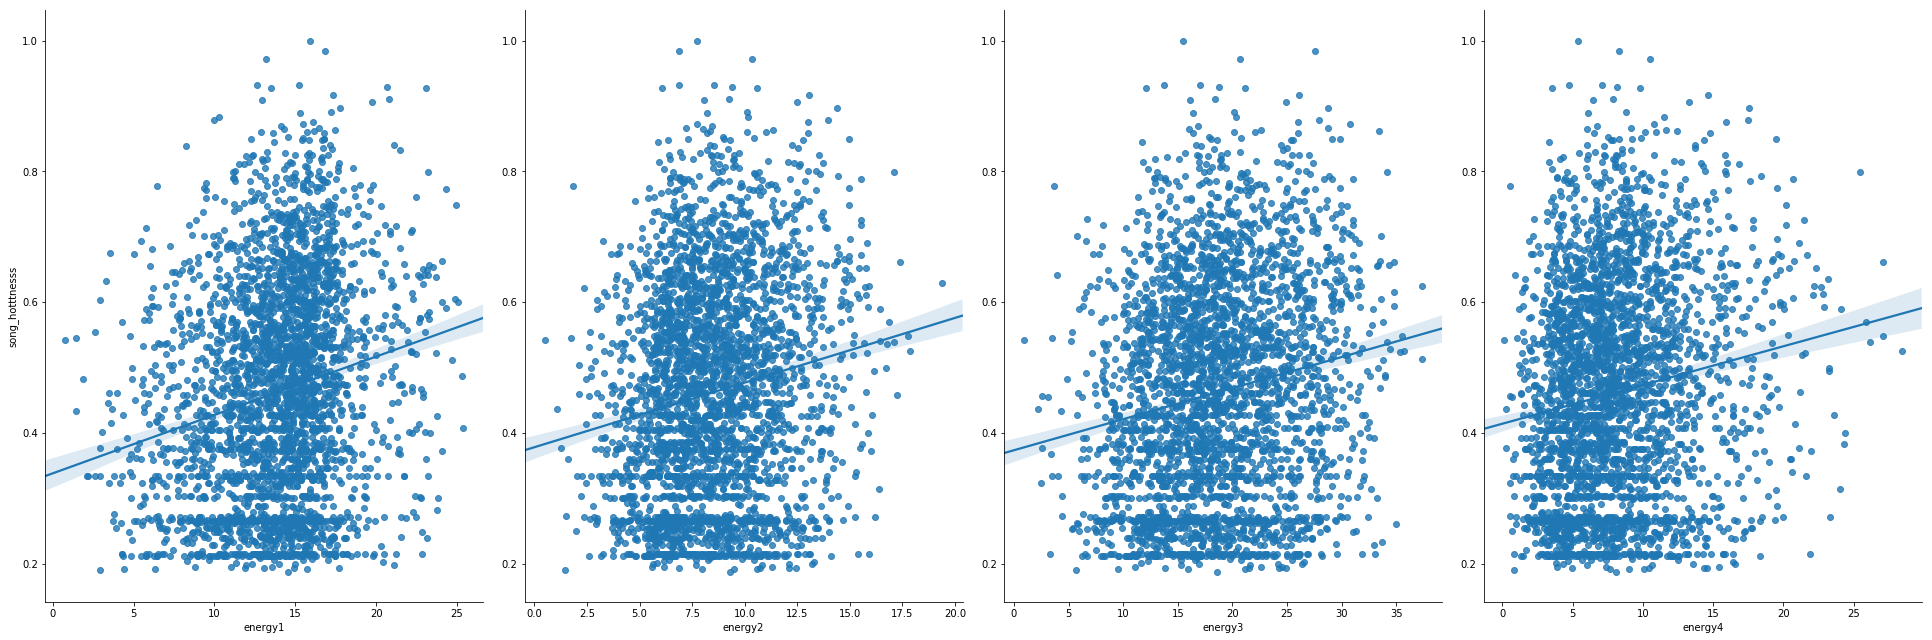

In [51]:
%run utilities.py
loudness = training_DF['loudness']
tempo = training_DF['tempo']
time_sig = training_DF['time_signature']
sections_avg = training_DF['sections_avg']
beats_avg = training_DF['beats_avg']
tatums_avg = training_DF['tatums_avg']


# training_DF['energy1'] = (50+loudness)**2*(12-time_sig)/1000
# training_DF['energy2'] = (50+loudness)**2*(12-time_sig)/(5000*beats_avg)
# training_DF['energy3'] = (50+loudness)**2*(12-time_sig)/(10000*tatums_avg)
# training_DF['energy4'] = (50+loudness)**2*(12-time_sig)/(50000*tatums_avg*beats_avg)

util.generate_energy_measure(training_DF, testing_DF)

sns.pairplot(training_DF, x_vars=['energy1', 'energy2', 'energy3', 'energy4'], 
# sns.pairplot(training_DF, x_vars=['energy'], 
    y_vars='song_hotttnesss', size=9, aspect=.75, kind='reg')

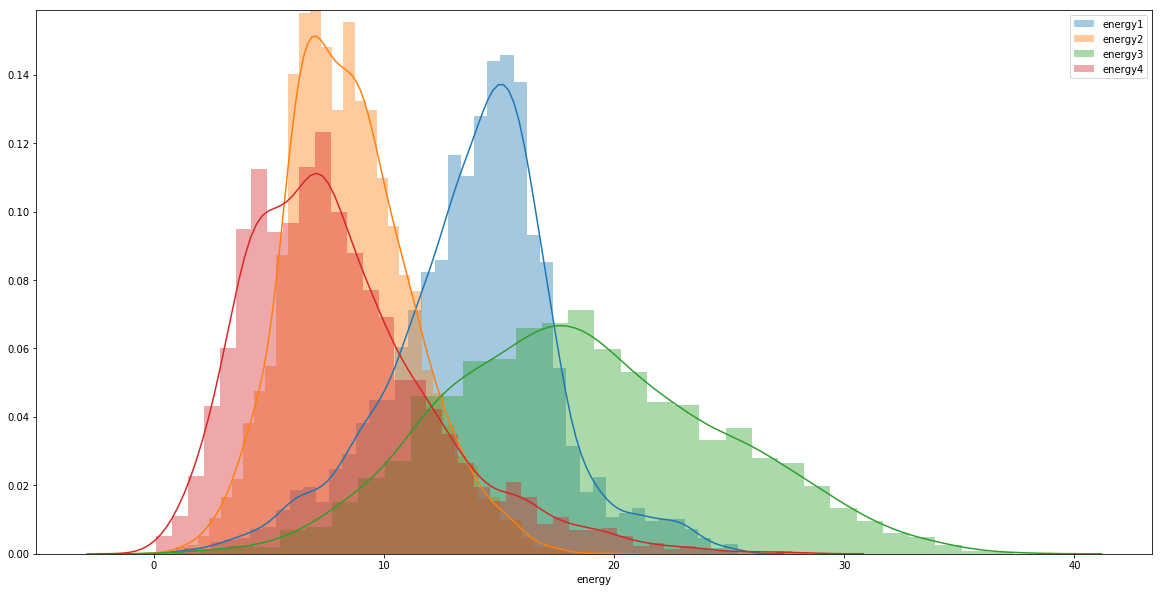

In [52]:
# Trying to figure out which energy is better to use... 
plt.subplots(figsize=(20,10))

energy = sns.distplot(training_DF['energy1'], label='energy1', )
energy = sns.distplot(training_DF['energy2'],  label='energy2')
energy = sns.distplot(training_DF['energy3'],  label='energy3')
energy = sns.distplot(training_DF['energy4'],  label='energy4', axlabel='energy')

energy.legend()

In [26]:
training_DF['energy'] = training_DF['energy3'] 

## Making a dervied feature:  danceability
`danceability`: We use a mix of features to compute danceability, including beat strength, tempo stability, overall tempo, and more.

In [27]:
loudness = training_DF['loudness']
tempo = training_DF['tempo']
time_sig = training_DF['time_signature']

training_DF['danceability1'] = (12-time_sig)*(tempo)/1000
training_DF['danceability2'] = (12-time_sig)*(tempo)/(5000*beats_avg)
training_DF['danceability3'] = (12-time_sig)*(tempo)/(10000*tatums_avg)
training_DF['danceability4'] = (12-time_sig)*tempo/(50000*beats_avg*tatums_avg)



sns.pairplot(training_DF, x_vars=['danceability1', 'danceability2', 'danceability3', 'danceability4'], 
# sns.pairplot(training_DF, x_vars=['energy'], 
    y_vars='song_hotttnesss', size=5, aspect=1,  kind='reg')

NameError: name 'beats_avg' is not defined

In [ ]:
# Trying to figure out which energy is better to use... 
plt.subplots(figsize=(20,10))

dance = sns.distplot(training_DF['danceability1'], label='danceability1', )
dance = sns.distplot(training_DF['danceability2'],  label='danceability2')
dance = sns.distplot(training_DF['danceability3'],  label='danceability3')
dance = sns.distplot(training_DF['danceability4'],  label='danceability4', axlabel='danceability')

dance.legend()

In [ ]:
training_DF['danceability'] = training_DF['danceability3']

# Makin Linear Reg Learners!

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
# Look at utilities.py for RunAndTestLinearRegModel() 

### using metadata (familiarity and artist_hott)

In [29]:
results = util.RunAndTestLinearRegModel("artist_familiarity", training_DF, testing_DF)

#  [x][1] = Mean squared error regression loss (bc its the smallest value lol)
mserr_training = results[1][1]
mserr_testing = results[2][1]

print "training_error\t", mserr_training
print "testing_error\t", mserr_testing
print "The min error values were:", min(results[1]), min(results[2])
print "std of hot is:", results[3]


training_error	0.020865399945
testing_error	0.0219537343089
The min error values were: 0.020865399945 0.0219537343089
std of hot is: 0.167935866201


In [30]:
results = util.RunAndTestLinearRegModel("artist_hotttnesss", training_DF, testing_DF)

#  [x][1] = Mean squared error regression loss (bc its the smallest value lol)
mserr_training = results[1][1]
mserr_testing = results[2][1]

print "training_error\t", mserr_training
print "testing_error\t", mserr_testing
print "The min error values were:", min(results[1]), min(results[2])
print "std of hot is:", results[3]


training_error	0.0212144791742
testing_error	0.022847896082
The min error values were: 0.0212144791742 0.022847896082
std of hot is: 0.167935866201


In [31]:
results = util.RunAndTestLinearRegModel("artist_hotttnesss artist_familiarity", training_DF, testing_DF)

#  [x][1] = Mean squared error regression loss (bc its the smallest value lol)
mserr_training = results[1][1]
mserr_testing = results[2][1]

print "training_error\t", mserr_training
print "testing_error\t", mserr_testing
print "The min error values were:", min(results[1]), min(results[2])
print "std of hot is:", results[3]


training_error	0.0201866554194
testing_error	0.0216817688276
The min error values were: 0.0201866554194 0.0216817688276
std of hot is: 0.167935866201


#### Conclusions?
can see that a combination of both features perform better

### using acoustic features 

In [32]:
# intervals only
results = util.RunAndTestLinearRegModel("segments_avg tatums_avg beats_avg bars_avg sections_avg", training_DF, testing_DF)

#  [x][1] = Mean squared error regression loss (bc its the smallest value lol)
mserr_training = results[1][1]
mserr_testing = results[2][1]

print "training_error\t", mserr_training
print "testing_error\t", mserr_testing
print "The min error values were:", min(results[1]), min(results[2])
print "std of hot is:", results[3]


training_error	0.0274846662217
testing_error	0.0284562302391
The min error values were: 0.0274846662217 0.0284562302391
std of hot is: 0.167935866201


In [33]:
# those other random acousitc features
X_cols = "key loudness duration tempo time_signature"
results = util.RunAndTestLinearRegModel(X_cols, training_DF, testing_DF)

#  [x][1] = Mean squared error regression loss (bc its the smallest value lol)
mserr_training = results[1][1]
mserr_testing = results[2][1]

print "training_error\t", mserr_training
print "testing_error\t", mserr_testing
print "The min error values were:", min(results[1]), min(results[2])
print "std of hot is:", results[3]


training_error	0.0264695504134
testing_error	0.028255902538
The min error values were: 0.0264695504134 0.028255902538
std of hot is: 0.167935866201


In [34]:
# Dance
X_cols = "danceability"
results = util.RunAndTestLinearRegModel(X_cols, training_DF, testing_DF)

#  [x][1] = Mean squared error regression loss (bc its the smallest value lol)
mserr_training = results[1][1]
mserr_testing = results[2][1]

print "training_error\t", mserr_training
print "testing_error\t", mserr_testing
print "The min error values were:", min(results[1]), min(results[2])
print "std of hot is:", results[3]


training_error	0.0279404622007
testing_error	0.0289624553839
The min error values were: 0.0279404622007 0.0289624553839
std of hot is: 0.167935866201


## Finding the best energy measure

In [94]:
# Energy1
X_cols = "energy1 "
results = util.RunAndTestLinearRegModel(X_cols, training_DF, testing_DF)

#  [x][1] = Mean squared error regression loss (bc its the smallest value lol)
mserr_training = results[1][1]
mserr_testing = results[2][1]

print "e1 training_error\t", mserr_training
# print "testing_error\t", mserr_testing
# print "The min error values were:", min(results[1]), min(results[2])
# print "std of hot is:", results[3]
# -------------------------------------------------

# Energy2
X_cols = "energy2"
results = util.RunAndTestLinearRegModel(X_cols, training_DF, testing_DF)

#  [x][1] = Mean squared error regression loss (bc its the smallest value lol)
mserr_training = results[1][1]
mserr_testing = results[2][1]

print "e2 training_error\t", mserr_training
# print "testing_error\t", mserr_testing
# print "The min error values were:", min(results[1]), min(results[2])
# print "std of hot is:", results[3]
# -------------------------------------------------

# Energy3
X_cols = "energy3"
results = util.RunAndTestLinearRegModel(X_cols, training_DF, testing_DF)

#  [x][1] = Mean squared error regression loss (bc its the smallest value lol)
mserr_training = results[1][1]
mserr_testing = results[2][1]

print "e3 training_error\t", mserr_training
# print "testing_error\t", mserr_testing
# print "The min error values were:", min(results[1]), min(results[2])
# print "std of hot is:", results[3]
# -------------------------------------------------

# Energy4
X_cols = "energy4"
results = util.RunAndTestLinearRegModel(X_cols, training_DF, testing_DF)

#  [x][1] = Mean squared error regression loss (bc its the smallest value lol)
mserr_training = results[1][1]
mserr_testing = results[2][1]

print "e4 training_error\t", mserr_training
# print "testing_error\t", mserr_testing
# print "The min error values were:", min(results[1]), min(results[2])
# print "std of hot is:", results[3]
# -------------------------------------------------


# EnergyALl
X_cols = "energy1 energy2 energy3 energy4"
results = util.RunAndTestLinearRegModel(X_cols, training_DF, testing_DF)

#  [x][1] = Mean squared error regression loss (bc its the smallest value lol)
mserr_training = results[1][1]
mserr_testing = results[2][1]

print "alle training_error\t", mserr_training
# print "testing_error\t", mserr_testing
# print "The min error values were:", min(results[1]), min(results[2])
# print "std of hot is:", results[3]
# -------------------------------------------------


e1 training_error	0.0269089464583
e2 training_error	0.0272360105452
e3 training_error	0.0271290249789
e4 training_error	0.0273357564771
alle training_error	0.0265687798634


In [96]:
# Energy+tat
X_cols = "energy1 energy2 energy3 energy4 tatums_avg"
results = util.RunAndTestLinearRegModel(X_cols, training_DF, testing_DF)

#  [x][1] = Mean squared error regression loss (bc its the smallest value lol)
mserr_training = results[1][1]
mserr_testing = results[2][1]

print "training_error\t", mserr_training
# print "testing_error\t", mserr_testing
# print "The min error values were:", min(results[1]), min(results[2])
# print "std of hot is:", results[3]
# -------------------------------------------------


# Energy+tat+beats
X_cols = "energy1 energy2 energy3 energy4 tatums_avg beats_avg"
results = util.RunAndTestLinearRegModel(X_cols, training_DF, testing_DF)

#  [x][1] = Mean squared error regression loss (bc its the smallest value lol)
mserr_training = results[1][1]
mserr_testing = results[2][1]

print "training_error\t", mserr_training
# print "testing_error\t", mserr_testing
# print "The min error values were:", min(results[1]), min(results[2])
# print "std of hot is:", results[3]
# -------------------------------------------------


training_error	0.0264951769761
training_error	0.0264884860756


In [97]:
# Energy+tat+beats
X_cols = "energy1 energy2 energy3 energy4 tatums_avg beats_avg"
results = util.RunAndTestLinearRegModel(X_cols, training_DF, testing_DF)

#  [x][1] = Mean squared error regression loss (bc its the smallest value lol)
mserr_training = results[1][1]
mserr_testing = results[2][1]

print "training_error\t", mserr_training
print "testing_error\t", mserr_testing
# print "The min error values were:", min(results[1]), min(results[2])
# print "std of hot is:", results[3]
# -------------------------------------------------

# those other random acousitc features
X_cols = "key loudness duration tempo time_signature"
results = util.RunAndTestLinearRegModel(X_cols, training_DF, testing_DF)

#  [x][1] = Mean squared error regression loss (bc its the smallest value lol)
mserr_training = results[1][1]
mserr_testing = results[2][1]

print "training_error\t", mserr_training
print "testing_error\t", mserr_testing
# print "The min error values were:", min(results[1]), min(results[2])
# print "std of hot is:", results[3]


training_error	0.0264884860756
training_error	0.0264695504134
